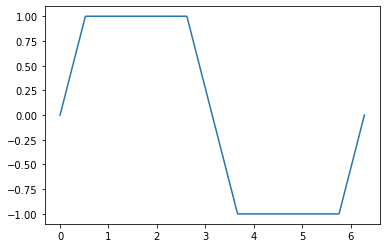

In [150]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets

# config
dtheta = 0.01
bEmfMax = 1 # max back emf, in volts
use_fourier_approx = False # use a more rounded bEmf given by fourier approx of trapezoid

# the trapezoidal wave is, dividing into twelve sectors (30 degrees) is
# 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
# r  t  t  t  t  f  f  b  b  b   b   r  r 
# 
# r = rising
# t = flat top
# f = falling
# b = flat bottom
two_pi_over_twelve = 2*pi/12
trapezoidal_wave_points = (
    (0, 0),
    (two_pi_over_twelve, bEmfMax),
    (two_pi_over_twelve*5, bEmfMax),
    (two_pi_over_twelve*7, -bEmfMax),
    (two_pi_over_twelve*11, -bEmfMax),
    (two_pi_over_twelve*12, 0),
)

# interpolate
trapezoidal_wave_xs = [p[0] for p in trapezoidal_wave_points]
trapezoidal_wave_ys = [p[1] for p in trapezoidal_wave_points]
thetas = np.linspace(0, 2*np.pi, int(2*np.pi/dtheta))
trapezoidal_wave = np.interp(thetas, trapezoidal_wave_xs, trapezoidal_wave_ys)

plt.plot(thetas, trapezoidal_wave)

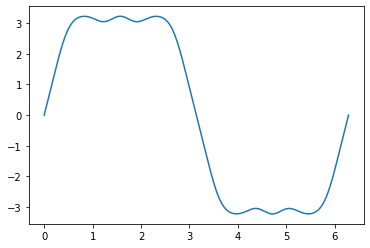

In [151]:
# Compute fourier approximation to trapezoidal wave (optional)
# first 11 fourier coefficients
sin_thetas = np.sin(thetas)
sin_3thetas = np.sin(3*thetas)
sin_5thetas = np.sin(5*thetas)
sin_7thetas = np.sin(7*thetas)
sin_11thetas = np.sin(11*thetas)

np.sin(thetas)
e0 = np.inner(sin_thetas, trapezoidal_wave)*dtheta
e3 = np.inner(sin_3thetas, trapezoidal_wave)*dtheta
e5 = np.inner(sin_5thetas, trapezoidal_wave)*dtheta
e7 = np.inner(sin_7thetas, trapezoidal_wave)*dtheta
e11 = np.inner(sin_11thetas, trapezoidal_wave)*dtheta

# see how good the approximation is visually
trapezoidal_wave_approx = e0*sin_thetas + e3*sin_3thetas + e5*sin_5thetas + e7*sin_7thetas + e11*sin_11thetas
plt.plot(thetas, trapezoidal_wave_approx)

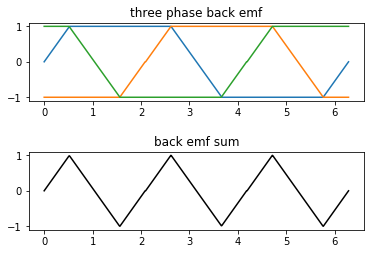

In [152]:
back_emf_a = trapepezoidal_wave_approx if use_fourier_approx else trapezoidal_wave
back_emf_b = np.roll(back_emf_a, int(2*np.pi/3/dtheta))
back_emf_c = np.roll(back_emf_a, int(4*np.pi/3/dtheta))

fig, axs = plt.subplots(2)
fig.tight_layout(pad=3)

axs[0].set_title("three phase back emf")
axs[0].plot(thetas, back_emf_a)
axs[0].plot(thetas, back_emf_b)
axs[0].plot(thetas, back_emf_c)

axs[1].set_title("back emf sum")
axs[1].plot(thetas, back_emf_a + back_emf_b + back_emf_c, color="black")

In [153]:
bemf_vectors = np.vstack((back_emf_a, back_emf_b, back_emf_c))

clarke_transform = np.array([
    [2.0/np.sqrt(6), -1.0/np.sqrt(6), -1.0/np.sqrt(6)],
    [0.0, 1.0/np.sqrt(2), -1.0/np.sqrt(2)],
    [1.0/np.sqrt(3), 1.0/np.sqrt(3), 1.0/np.sqrt(3)]
])
dqz_bemf_vectors = np.matmul(clarke_transform, bemf_vectors)


In [160]:
def plot_bemf_state(idx):
    lim = 6 if use_fourier_approx else 2.5
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    line = plt.Line2D(dqz_bemf_vectors[0,:], dqz_bemf_vectors[1,:], linestyle="dashed")
    ax.add_line(line)
    
    # line to current bemf state
    curr_bemf = plt.Line2D((0, dqz_bemf_vectors[0, idx]), (0, dqz_bemf_vectors[1, idx]))
    curr_bemf.set_label("Clarke Transformed bEMF")
    ax.add_line(curr_bemf)
    
    # theta line
    theta = thetas[idx]
    x, y = np.cos(theta), np.sin(theta)
    theta_line = plt.Line2D((0, 10*y), (0, -10*x), color="green")
    theta_line.set_label("Rotor angle")
    ax.add_line(theta_line)
    
    ax.legend()

widgets.interact(plot_bemf_state, idx=(0, dqz_bemf_vectors.shape[1]-1))

interactive(children=(IntSlider(value=313, description='idx', max=627), Output()), _dom_classes=('widget-inter…

<function __main__.plot_bemf_state(idx)>